## Observations and Insights 

In [23]:
# Dependencies and Setup
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#merged on left because I wanted the entire "study_results" data frame and then everything that isn't in "study_results"
#from the "mouse_metadata"

merge_df = pd.merge(study_results, mouse_metadata, how="left", on= "Mouse ID")

# Display the data table for preview

merge_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.

len(merge_df['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_ids = merge_df[merge_df.duplicated()]
duplicate_ids

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [4]:
#get the duplicate Mouse_IDs as a list
duplicate_mouse_id = [duplicate_ids.iloc[0,0]]
duplicate_mouse_id

['g989']

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

#pull Mouse ID from the existing data frame and print out only Mouse ID from the duplicate value. isin prints the 
#specific data given a certain condition

duplicate_mouse_data = merge_df[merge_df['Mouse ID'].isin(duplicate_mouse_id)]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_data = pd.concat([merge_df, duplicate_mouse_data]).drop_duplicates(keep=False)
cleaned_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.

number_of_mice = len(cleaned_data['Mouse ID'].unique())
number_of_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = cleaned_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = cleaned_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = cleaned_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
st_dev = cleaned_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = cleaned_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

summary_statistics = pd.DataFrame({
                                    "Mean Tumor Volume (mm3)":mean,
                                    "Median Tumor Volume (mm3)": median,
                                    "Variance of Tumor Volume (mm3)":variance,
                                    "Standard Deviation of Tumor Volume (mm3)": st_dev,
                                    "Standard Error of the Mean for Tumor Volume (mm3)":sem,
})

summary_statistics

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance of Tumor Volume (mm3),Standard Deviation of Tumor Volume (mm3),Standard Error of the Mean for Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

aggregate_df = cleaned_data.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
aggregate_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

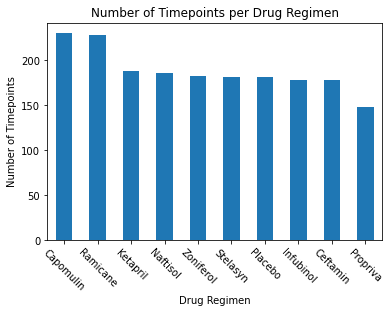

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#.plot(kind = ) is Pandas

drug_graph = cleaned_data['Drug Regimen'].value_counts()

drug_graph.plot(kind = 'bar')
plt.xticks(rotation = 315)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.title('Number of Timepoints per Drug Regimen')
plt.show()

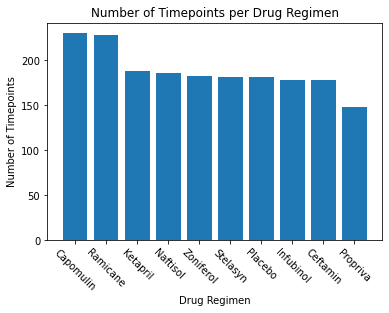

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# plt.____ is Matplotlib

plt.bar(drug_graph.index.values, drug_graph.values)
plt.xticks(rotation = 315)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.title('Number of Timepoints per Drug Regimen')
plt.show()


In [12]:
sex_graph = cleaned_data['Sex'].value_counts()

<AxesSubplot:ylabel='Sex'>

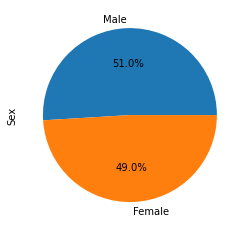

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_graph.plot(kind='pie', autopct="%1.1f%%")

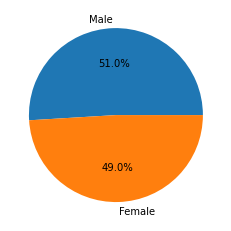

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sex_graph.values, labels = sex_graph.index.values, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

grouped_mice = cleaned_data.groupby(['Mouse ID'])
grouped_tumor = grouped_mice["Timepoint"].max()
grouped_tumor

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# merge new df with cleaned_df with a left merge

tumor_merge_df = pd.merge(cleaned_data, grouped_tumor, how="left", on= "Mouse ID")
tumor_merge_df = tumor_merge_df.rename (columns= {"Timepoint_y" : "Maximum Timepoint", "Timepoint_x": "Timepoint"})
tumor_merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Maximum Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,f932,0,45.000000,0,Ketapril,Male,15,29,0
2,g107,0,45.000000,0,Ketapril,Female,2,29,35
3,a457,0,45.000000,0,Ketapril,Female,11,30,10
4,c819,0,45.000000,0,Ketapril,Male,21,25,40
...,...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25,45
1876,u364,45,31.023923,3,Capomulin,Male,18,17,45
1877,p438,45,61.433892,1,Ceftamin,Female,11,26,45
1878,x773,45,58.634971,4,Placebo,Female,21,30,45


In [46]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.   
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for x in drug_list:
    variable = tumor_merge_df.loc[tumor_merge_df["Drug Regimen"] == x, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_volume.append(variable)

    # Determine outliers using upper and lower bounds
    quartiles = variable.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    

#within the for loop, loc off the variable_df where tumor volume is above/below is outside of those thresholds


Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.
Values below 24.1865864625 could be outliers.
Values above 57.488048122500004 could be outliers.
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.
Values below 32.81891142624998 could be outliers.
Values above 71.19095325625001 could be outliers.


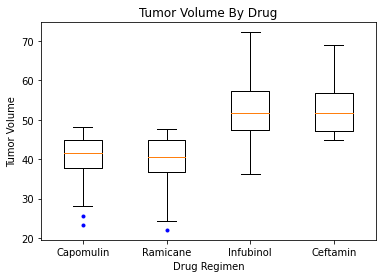

In [48]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume By Drug')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(tumor_volume, sym='b.')
positions = [1,2,3,4]
labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
plt.xticks (positions, labels)
plt.show()

## Line and Scatter Plots

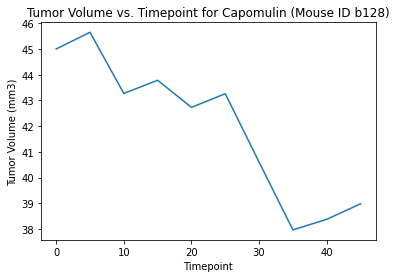

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_df = tumor_merge_df.set_index("Mouse ID")

plt.plot(capomulin_df.loc["b128","Timepoint"], capomulin_df.loc["b128","Tumor Volume (mm3)"])
plt.title("Tumor Volume vs. Timepoint for Capomulin (Mouse ID b128)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_scatter_df = tumor_merge_df.set_index("Drug Regimen")

In [34]:
capomulin_scatter_df = tumor_merge_df.loc[tumor_merge_df["Drug Regimen"] == "Capomulin"]

In [35]:
capomulin_scatter_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Maximum Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
224,j246,0,45.000000,0,Capomulin,Female,21,21,35
225,r554,0,45.000000,0,Capomulin,Female,8,17,45
226,s185,0,45.000000,0,Capomulin,Female,3,17,45
227,b742,0,45.000000,0,Capomulin,Male,7,21,45
...,...,...,...,...,...,...,...,...,...
1841,s710,45,40.728578,1,Capomulin,Female,1,23,45
1846,j119,45,38.125164,1,Capomulin,Female,7,23,45
1865,i557,45,47.685963,1,Capomulin,Female,1,24,45
1875,r944,45,41.581521,2,Capomulin,Male,12,25,45


In [38]:
grouped_avg = capomulin_scatter_df.groupby(["Mouse ID"]).mean()

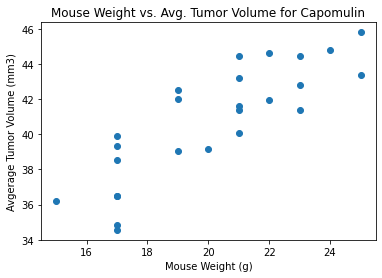

In [42]:
x_values = grouped_avg.loc[:, "Weight (g)"]
y_values = grouped_avg.loc[:, "Tumor Volume (mm3)"]
plt.scatter(x_values,y_values)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Avgerage Tumor Volume (mm3)')
plt.title("Mouse Weight vs. Avg. Tumor Volume for Capomulin")
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84
The r-squared is: 0.7088568047708723


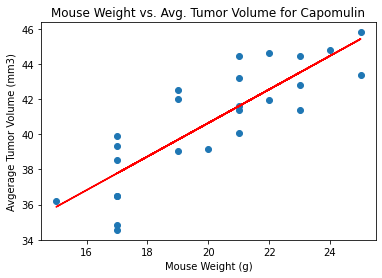

In [44]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#correlation coefficient
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#linear regression model

x_values = grouped_avg.loc[:, "Weight (g)"]
y_values = grouped_avg.loc[:, "Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,100),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Avgerage Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.title("Mouse Weight vs. Avg. Tumor Volume for Capomulin")
plt.show()